# Training XResNet on Imagenette

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from importlib.util import find_spec
if find_spec("model") is None:
    import sys
    sys.path.append('..')

In [3]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [4]:
from model.backbone.xresnet import xresnet50
from data_loader.data_loaders import load_imagenette160_dls

In [5]:
dls = load_imagenette160_dls(bs=32)

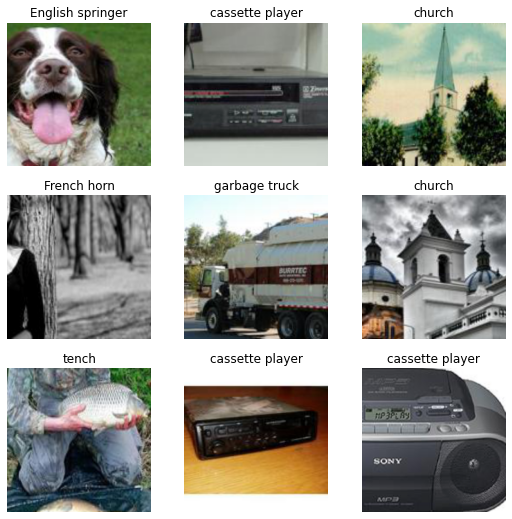

In [6]:
dls.show_batch()

## Using FastAI Init (init_cnn).

In [7]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), metrics=accuracy)

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=0.5248074531555176)

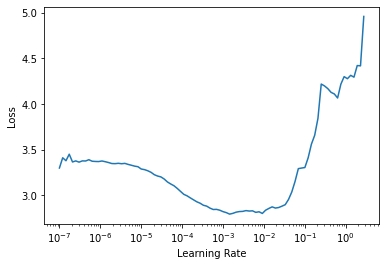

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.080554,2.762206,0.266752,01:02
1,1.658066,2.265312,0.466242,01:02
2,1.312482,1.202436,0.613248,01:02
3,1.047727,1.050240,0.660892,01:02
4,0.864211,0.886420,0.718981,01:02


## PyTorch BatchNorm Init + Detectron C2MSR Init + 1Hour Linear Init

In [10]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), metrics=accuracy)

SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=1.0964781722577754e-06)

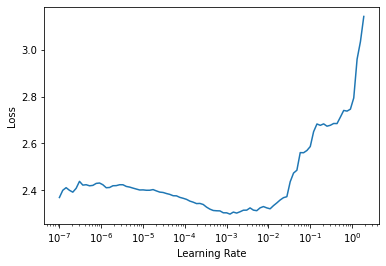

In [11]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.897969,2.158692,0.357962,01:00
1,1.521136,1.482628,0.520510,01:01
2,1.227089,1.295064,0.578853,01:01
3,1.001495,0.956772,0.689682,01:01
4,0.820332,0.876819,0.716178,01:01


## Train XResNet50 with Label Smoothing

In [15]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)

SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=0.25118863582611084)

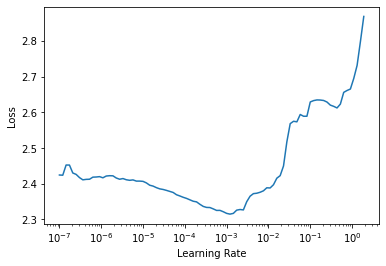

In [16]:
learn.lr_find()

In [17]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.995932,2.635135,0.286115,01:00
1,1.685077,1.645459,0.520510,01:00
2,1.468901,1.441637,0.611210,01:01
3,1.291183,1.278660,0.683057,01:01
4,1.175559,1.194724,0.712102,01:01


SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=2.2908675418875646e-06)

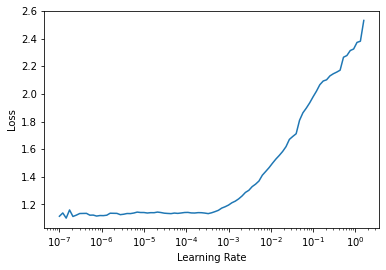

In [18]:
learn.lr_find()

# Train XResNet50 + Mixup

In [19]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy, cbs=MixUp())

SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=0.12022644281387329)

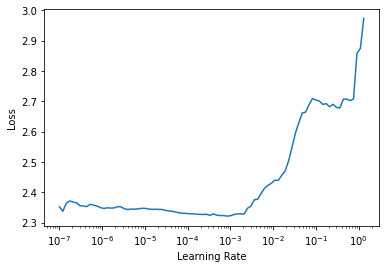

In [20]:
learn.lr_find()

In [21]:
learn.fit_one_cycle(5, 5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,2.203264,2.236632,0.259363,01:00
1,2.012853,2.008118,0.325605,01:00
2,1.903627,1.784127,0.441783,01:01
3,1.821911,1.684073,0.497580,01:01
4,1.791666,1.635171,0.518217,01:01


## Overfit Data Using XResNet50++ (bs = 32)

In [7]:
from model.backbone.xresnet import xresnet101

In [8]:
model = xresnet101(num_classes=10, train_mode=True)

In [9]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy, wd=0)

SuggestedLRs(lr_min=7.585775892948732e-06, lr_steep=0.2089296132326126)

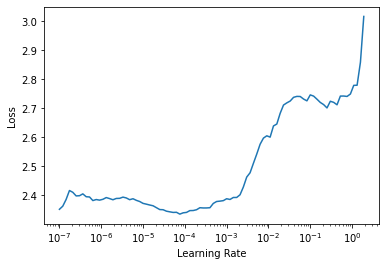

In [10]:
learn.lr_find()

In [11]:
learn.fit_one_cycle(4, 5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,2.114120,2.199394,0.229809,01:37
1,1.905813,1.969013,0.341401,01:38
2,1.761632,1.758412,0.460127,01:39
3,1.730998,1.719526,0.470064,01:38


In [12]:
model = xresnet101(num_classes=10, train_mode=True)

In [13]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=0.0831763744354248)

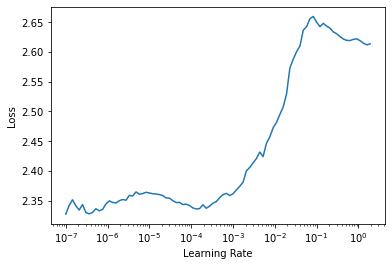

In [14]:
learn.lr_find()

In [15]:
learn.fit_one_cycle(5, 4e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.223313,2.253548,0.170191,01:39
1,2.181374,26.455107,0.138344,01:41
2,2.099987,3.560304,0.213248,01:39
3,1.918421,1.867719,0.384968,01:39
4,1.804745,1.784396,0.429045,01:39


In [15]:
torch.cuda.empty_cache()

In [28]:
def pretty_size(size):
	"""Pretty prints a torch.Size object"""
	assert(isinstance(size, torch.Size))
	return " × ".join(map(str, size))

def dump_tensors(gpu_only=True):
	"""Prints a list of the Tensors being tracked by the garbage collector."""
	import gc
	total_size = 0
	for obj in gc.get_objects():
		try:
			if torch.is_tensor(obj):
				if not gpu_only or obj.is_cuda:
					print("%s:%s%s %s" % (type(obj).__name__, 
										  " GPU" if obj.is_cuda else "",
										  " pinned" if obj.is_pinned else "",
										  pretty_size(obj.size())))
					total_size += obj.numel()
			elif hasattr(obj, "data") and torch.is_tensor(obj.data):
				if not gpu_only or obj.is_cuda:
					print("%s → %s:%s%s%s%s %s" % (type(obj).__name__, 
												   type(obj.data).__name__, 
												   " GPU" if obj.is_cuda else "",
												   " pinned" if obj.data.is_pinned else "",
												   " grad" if obj.requires_grad else "", 
												   " volatile" if obj.volatile else "",
												   pretty_size(obj.data.size())))
					total_size += obj.data.numel()
		except Exception as e:
			pass        
	print("Total size:", total_size)

In [29]:
dump_tensors()

Tensor: GPU pinned 1 × 3 × 1 × 1
Tensor: GPU pinned 1 × 3 × 1 × 1
Tensor: GPU pinned 32 × 3 × 3 × 3
Tensor: GPU pinned 32 × 32 × 3 × 3
Tensor: GPU pinned 64 × 32 × 3 × 3
Tensor: GPU pinned 32
Tensor: GPU pinned 32
Tensor: GPU pinned 32
Tensor: GPU pinned 32
Tensor: GPU pinned 
Tensor: GPU pinned 32
Tensor: GPU pinned 32
Tensor: GPU pinned 32
Tensor: GPU pinned 32
Tensor: GPU pinned 
Tensor: GPU pinned 64
Tensor: GPU pinned 64
Tensor: GPU pinned 64
Tensor: GPU pinned 64
Tensor: GPU pinned 
Tensor: GPU pinned 64 × 64 × 1 × 1
Tensor: GPU pinned 64
Tensor: GPU pinned 64
Tensor: GPU pinned 64
Tensor: GPU pinned 64
Tensor: GPU pinned 
Tensor: GPU pinned 64 × 64 × 3 × 3
Tensor: GPU pinned 64
Tensor: GPU pinned 64
Tensor: GPU pinned 64
Tensor: GPU pinned 64
Tensor: GPU pinned 
Tensor: GPU pinned 256 × 64 × 1 × 1
Tensor: GPU pinned 256
Tensor: GPU pinned 256
Tensor: GPU pinned 256
Tensor: GPU pinned 256
Tensor: GPU pinned 
Tensor: GPU pinned 256 × 64 × 1 × 1
Tensor: GPU pinned 256
Tensor: GPU p

/home/kmh/anaconda3/envs/fastml/lib/python3.8/site-packages/torch/distributed/distributed_c10d.py:125: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "
